<a href="https://colab.research.google.com/github/Saurabh019/Incubyte_Campus_placement-2023-/blob/main/MNIST_Digits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation,Flatten,Conv2D,MaxPooling2D


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [5]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [7]:
print("Train Data Shape:",X_train.shape)
print("Test Data Shape:",X_test.shape)

Train Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)


In [8]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [9]:
X_train[0].shape

(28, 28, 1)

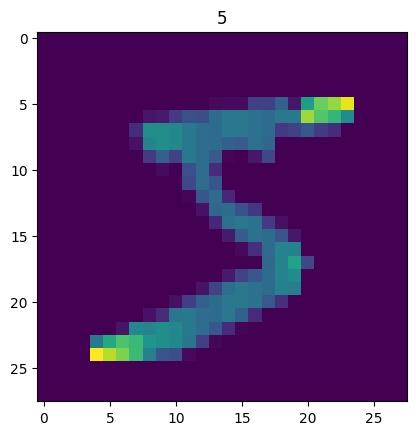

In [10]:
plt.imshow(X_train[0])
plt.title(y_train[0])
plt.show()

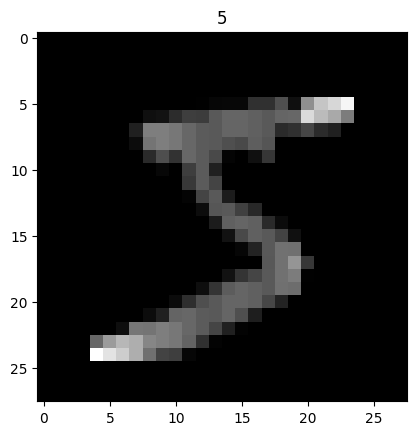

In [11]:
plt.imshow(X_train[0],cmap='gray')
plt.title(y_train[0])
plt.show()

In [12]:
model = Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3),
activation='relu',input_shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.Flatten())

In [13]:
model.add(layers.Dense(units=84,activation='relu'))
model.add(layers.Dense(units=24,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 84)                1075284   
                                                                 
 dense_1 (Dense)             (None, 24)                2

In [14]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf",25)
visualkeras.layered_view(model,legend=True,font=font)

ModuleNotFoundError: ignored

In [15]:
hist = model.fit(X_train,y_train,epochs=5,batch_size=20,validation_split=0.2)

Epoch 1/5
2400/2400 [==============================] - 185s 75ms/step - loss: 0.1769 - accuracy: 0.9465 - val_loss: 0.0639 - val_accuracy: 0.9797
Epoch 2/5
2400/2400 [==============================] - 132s 55ms/step - loss: 0.0568 - accuracy: 0.9829 - val_loss: 0.0508 - val_accuracy: 0.9859
Epoch 3/5
2400/2400 [==============================] - 131s 54ms/step - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0534 - val_accuracy: 0.9847
Epoch 4/5
2400/2400 [==============================] - 127s 53ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0570 - val_accuracy: 0.9847
Epoch 5/5
2400/2400 [==============================] - 131s 55ms/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0583 - val_accuracy: 0.9862


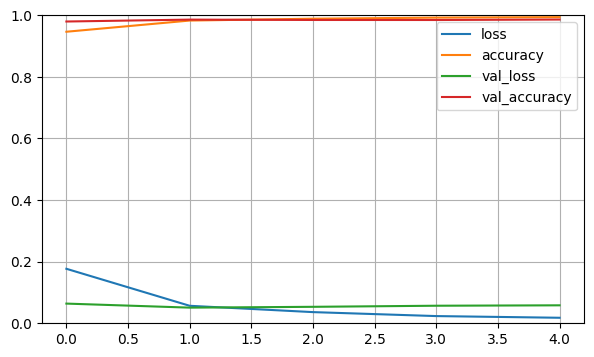

In [16]:
import pandas as pd
pd.DataFrame(hist.history).plot(figsize=(7,4))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print("Test loss:",test_loss)
print("Test Accuracy:",test_acc)
prediction = model.predict(X_test)


313/313 [==============================] - 9s 26ms/step - loss: 0.0502 - accuracy: 0.9869
Test loss: 0.05017292499542236
Test Accuracy: 0.9868999719619751
313/313 [==============================] - 5s 17ms/step


In [19]:
# After first Con Layer
test_model = Sequential()
test_model.add(layers.Conv2D(3,(3,3),input_shape=X_train[0].shape,activation="relu"))

In [24]:
def visualise_h(test_model,h):
  h_batch = np.expand_dims(h,axis=0)
  conv_h = test_model.predict(h_batch)
  conv_h = np.squeeze(conv_h,axis=0)
  plt.imshow(conv_h)

1/1 [==============================] - 0s 32ms/step


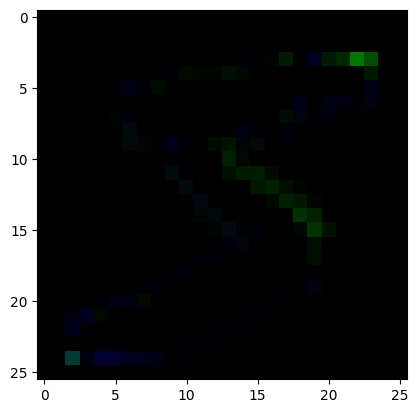

In [27]:
visualise_h(test_model,X_train[0])

1/1 [==============================] - 0s 347ms/step


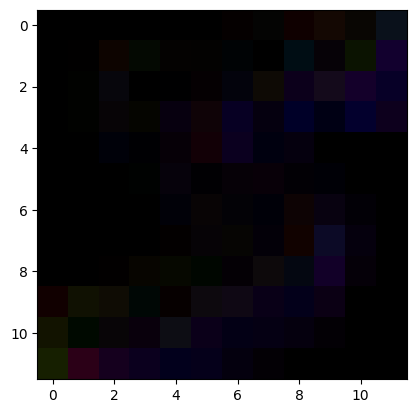

In [28]:
#After first convolutional layer and MaxPooling
test_model = Sequential()
test_model.add(layers.Conv2D(3,(3,3),input_shape=X_train[0].shape,activation='relu'))
test_model.add(layers.Conv2D(3,(3,3),activation='relu'))
test_model.add(MaxPooling2D(pool_size=(2,2)))
visualise_h(test_model,X_train[0])

1/1 [==============================] - 0s 108ms/step


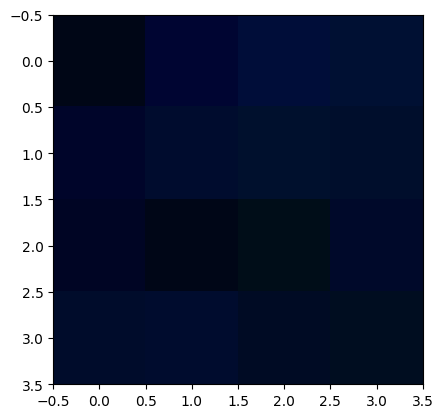

In [31]:
#two convolutional layer and MaxPooling
test_model = Sequential()
test_model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=X_train[0].shape))
test_model.add(layers.Conv2D(16,(3,3),activation='relu'))
test_model.add(MaxPooling2D(pool_size=(2,2)))

test_model.add(layers.Conv2D(16,(3,3),activation='relu'))
test_model.add(layers.Conv2D(3,(3,3),activation='relu'))
test_model.add(MaxPooling2D(pool_size=(2,2)))
visualise_h(test_model,X_train[1])